In [1]:
import warnings
warnings.filterwarnings("ignore")

## Model

In [2]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

## First Dataset

In [3]:
df1=pd.read_csv("C1.csv")

In [4]:
df1

,mod,dir,temp,rh,mslp,Speed,Direction,Energy
0,7.640845,284.283081,279.543488,0.872665,102356.031250,8.18,250.0,553.42
1,7.640845,284.283081,279.543488,0.872665,102356.031250,8.23,253.0,617.98
2,7.640845,284.283081,279.543488,0.872665,102356.031250,8.54,259.0,537.41
3,5.212380,277.633667,280.006012,0.797998,102423.726562,8.74,268.0,683.49
4,5.212380,277.633667,280.006012,0.797998,102423.726562,8.44,263.0,619.89
...,...,...,...,...,...,...,...,...
14137,0.662058,206.916153,277.691437,0.830402,102878.960938,5.04,217.0,0.00
14138,0.662058,206.916153,277.691437,0.830402,102878.960938,4.88,217.0,0.00
14139,0.662058,206.916153,277.691437,0.830402,102878.960938,4.86,216.0,0.00
14140,0.662058,206.916153,277.691437,0.830402,102878.960938,4.93,215.0,0.00


In [5]:
X=df1.drop(columns=["Energy"]).values

In [6]:
X.shape

(14142, 7)

In [7]:
y=df1["Energy"].values

In [8]:
y.shape

(14142,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.035, random_state=42)
print("Number of records in training data : ", X_train.shape[0])
print("Number of records in test data : ", X_test.shape[0])
print("Total distinct number of threat types in training data : ",len(set(y_train)))
print("Total distinct number of threat types in test data : ",len(set(y_test)))

Number of records in training data :  13647
Number of records in test data :  495
Total distinct number of threat types in training data :  10284
Total distinct number of threat types in test data :  400


In [10]:
scalerX = MinMaxScaler(feature_range=(0, 1))
rescaled_X_train = scalerX.fit_transform(X_train)
rescaled_X_test = scalerX.fit_transform(X_test)

In [11]:
scalery = MinMaxScaler(feature_range=(0, 1))
rescaled_y_train = scalery.fit_transform(y_train.reshape(-1,1))
rescaled_y_train=rescaled_y_train.T[0]
rescaled_y_test = scalery.fit_transform(y_test.reshape(-1,1))
rescaled_y_test=rescaled_y_test.T[0]

In [12]:
rescaled_y_test.shape

(495,)

In [13]:
from model import get_lstm
from GWO import GWO

In [14]:
gwo = GWO(576, 0.4, 0.7, 0.9) 
lag = 12

In [15]:
config = {"batch": 1024, "epochs": 100}

In [16]:
name= 'gwo-lstm'

In [17]:
rescaled_X_train  = np.reshape(rescaled_X_train , (rescaled_X_train.shape[0], rescaled_X_train.shape[1], 1))
m = get_lstm([7, 64, 64, 1])

In [18]:
gwo.train_model(m, rescaled_X_train, rescaled_y_train, name, config)

(13647, 7, 1) (13647,)
1 13647
Epoch 1/100
13/13 [==============================] - 6s 113ms/step - loss: 0.0752 - mape: 59209652.0000 - val_loss: 0.0467 - val_mape: 33306192.0000
Epoch 2/100
13/13 [==============================] - 1s 70ms/step - loss: 0.0410 - mape: 33376348.0000 - val_loss: 0.0455 - val_mape: 34936268.0000
Epoch 3/100
13/13 [==============================] - 1s 67ms/step - loss: 0.0400 - mape: 33234042.0000 - val_loss: 0.0449 - val_mape: 31927298.0000
Epoch 4/100
13/13 [==============================] - 1s 68ms/step - loss: 0.0393 - mape: 32717270.0000 - val_loss: 0.0445 - val_mape: 29553024.0000
Epoch 5/100
13/13 [==============================] - 1s 68ms/step - loss: 0.0384 - mape: 32145074.0000 - val_loss: 0.0435 - val_mape: 28861978.0000
Epoch 6/100
13/13 [==============================] - 1s 68ms/step - loss: 0.0374 - mape: 31683850.0000 - val_loss: 0.0421 - val_mape: 39391668.0000
Epoch 7/100
13/13 [==============================] - 1s 68ms/step - loss: 0.0362

Epoch 56/100
13/13 [==============================] - 1s 81ms/step - loss: 0.0210 - mape: 13990575.0000 - val_loss: 0.0219 - val_mape: 10315817.0000
Epoch 57/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0214 - mape: 13523122.0000 - val_loss: 0.0234 - val_mape: 14494381.0000
Epoch 58/100
13/13 [==============================] - 1s 83ms/step - loss: 0.0210 - mape: 13970511.0000 - val_loss: 0.0285 - val_mape: 9326828.0000
Epoch 59/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0203 - mape: 13284530.0000 - val_loss: 0.0275 - val_mape: 15308098.0000
Epoch 60/100
13/13 [==============================] - 1s 86ms/step - loss: 0.0212 - mape: 13626568.0000 - val_loss: 0.0227 - val_mape: 14443640.0000
Epoch 61/100
13/13 [==============================] - 1s 83ms/step - loss: 0.0208 - mape: 13528201.0000 - val_loss: 0.0216 - val_mape: 14175508.0000
Epoch 62/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0203 - mape: 13598819.0000 - v

In [19]:
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl

In [20]:
gwo_lstm = load_model('model/gwo-lstm.h5')

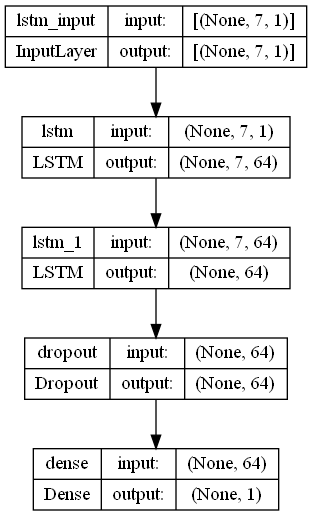

In [21]:
file = 'model/' + name + '.png'
plot_model(gwo_lstm, to_file = file, show_shapes = True)

In [22]:
y_preds = []

In [23]:
rescaled_X_test = np.reshape(rescaled_X_test , (rescaled_X_test.shape[0], rescaled_X_test.shape[1], 1))

In [24]:
predicted = gwo_lstm.predict(rescaled_X_test)

16/16 [==============================] - 0s 3ms/step


In [25]:
predicted = scalery.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]

In [26]:
for i in range(len(predicted)):
	gwo.update(i)

	predicted[i] = predicted[i] + gwo.fix(y_test[i], predicted[i], layer = 2)

In [27]:
y_preds.append(predicted)

In [28]:
predicted= predicted.T

## Evaluation

In [29]:
actual = pd.DataFrame(y_test, columns=["actual"])

In [30]:
predicted= pd.DataFrame(predicted, columns=["predict"])

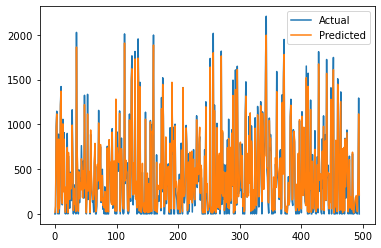

In [31]:
from matplotlib import pyplot
# plot expected vs actual
pyplot.plot(actual, label='Actual')
pyplot.plot(predicted, label='Predicted')
pyplot.legend()
pyplot.show()

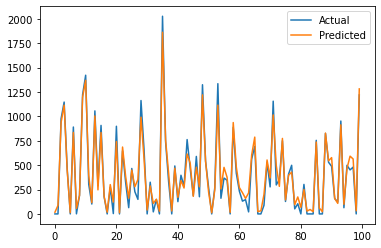

In [32]:
pyplot.plot(y_test[:100], label='Actual')
pyplot.plot(predicted[:100], label='Predicted')
pyplot.legend()
pyplot.show()

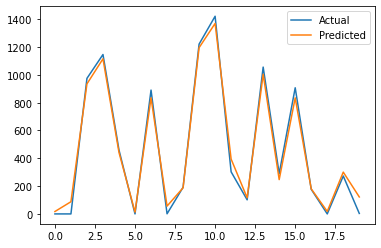

In [33]:
pyplot.plot(y_test[:20], label='Actual')
pyplot.plot(predicted[:20], label='Predicted')
pyplot.legend()
pyplot.show()

In [34]:
metrics.r2_score(y_test, predicted)

0.9727900569100554

In [35]:
metrics.mean_absolute_error(y_test, predicted)

64.37996572482946